In [126]:
# Importing Standard Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing sklearn Libraries
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import metrics


In [127]:
df = pd.read_csv("https://cdn.iisc.talentsprint.com/CDS/Datasets/auto_mpg.csv")
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [128]:
# Drop non-numeric columns (‘car name’)
df_numeric = df.select_dtypes(include=["number"])


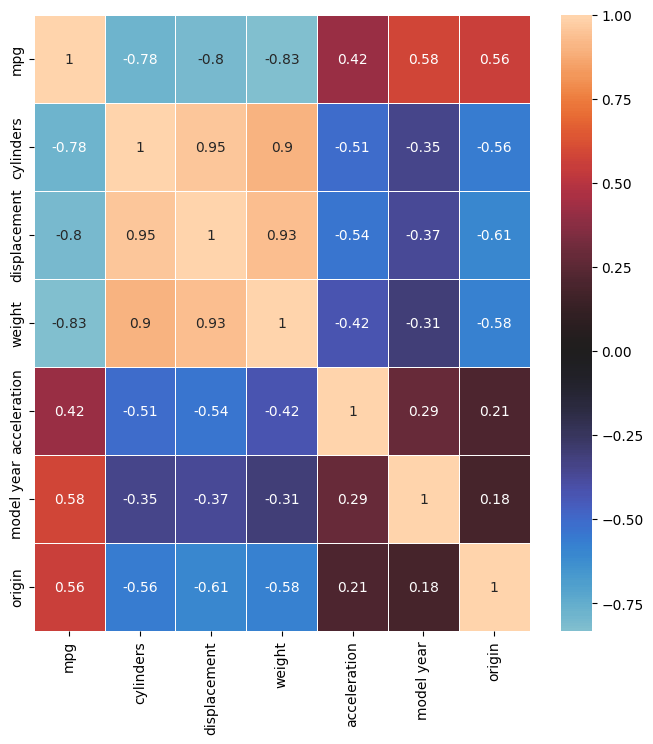

In [129]:
auto_ = df_numeric.apply(pd.to_numeric, errors="coerce")
plt.figure(figsize=(8, 8))
sns.heatmap(auto_.corr(), annot=True, linewidth=0.5, center=0)
plt.show()


In [130]:
xgb_reg = xgb.XGBRegressor(
    objective="reg:squarederror",
    colsample_bytree=1,
    learning_rate=0.1,
    max_depth=5,
    alpha=10,
    n_estimators=10,
    random_state=0,
)


In [131]:
# pick only two features 'acceleration' and 'displacement' from the dataset 'df_numeric' to predict 'mpg'
X = df_numeric[["acceleration", "displacement"]]
y = df_numeric["mpg"]


In [132]:
X


,acceleration,displacement
0,12.0,307.0
1,11.5,350.0
2,11.0,318.0
3,12.0,304.0
4,10.5,302.0
...,...,...
393,15.6,140.0
394,24.6,97.0
395,11.6,135.0
396,18.6,120.0


In [133]:
y


0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [135]:
# xgb_reg.fit(X_train, y_train)

# y_pred = xgb_reg.predict(X_test)

xgb_reg.fit(X, y)


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=10,
             n_jobs=None, num_parallel_tree=None, ...)

In [136]:
# find the mean squared error for the first row in original data set
y_pred1 = xgb_reg.predict(X[:1])
y_true1 = y[:1]


In [137]:
y_true1


0    18.0
Name: mpg, dtype: float64

In [138]:
y_pred1


array([17.859634], dtype=float32)

In [139]:
mse1 = mean_squared_error(y_true1, y_pred1)
mse1


0.019702501827850938

In [140]:
# ‘origin’, ‘acceleration’, and ‘displacement’
X = df_numeric[["origin", "acceleration", "displacement"]]
y = df_numeric["mpg"]


In [141]:
X


,origin,acceleration,displacement
0,1,12.0,307.0
1,1,11.5,350.0
2,1,11.0,318.0
3,1,12.0,304.0
4,1,10.5,302.0
...,...,...,...
393,1,15.6,140.0
394,2,24.6,97.0
395,1,11.6,135.0
396,1,18.6,120.0


In [142]:
y


0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [143]:
xgb_reg = XGBRegressor(
    objective="reg:squarederror",
    colsample_bytree=0.3,
    learning_rate=0.1,
    max_depth=5,
    alpha=10,
    n_estimators=10,
    importance_type="weight",
    random_state=0,
)


In [144]:
xgb_reg.fit(X, y)


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type='weight',
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

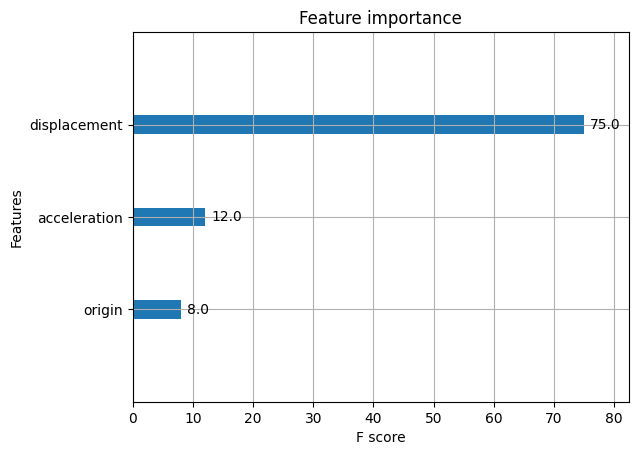

In [145]:
xgb.plot_importance(xgb_reg)
plt.rcParams["figure.figsize"] = [5, 5]
plt.show()
